In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy import constants
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
standard=pd.read_csv('罗丹明B-10mgL.txt',sep=' ',usecols=[0,1])
standard.columns=['nm','Abs']
data_lis=[standard]
name_lis=['10mg/L','A组','B组','C组','D组']
color=['r','y','c','g','b']

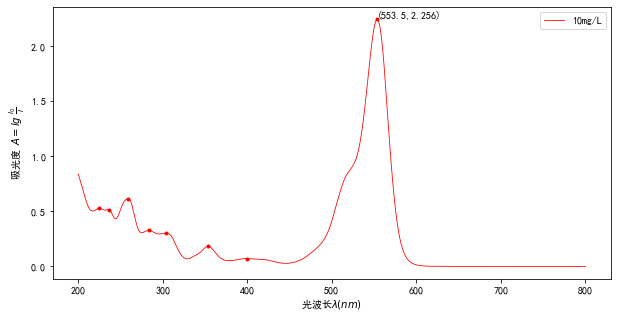

In [9]:
peaks_lis=[]
plt.figure(figsize=[10,5])
plt.xlabel(r'光波长$\lambda(nm)$')
plt.ylabel(r'吸光度 $A=lg\ {\frac{I_0}{I}}$')
xy=standard.values.T
x=xy[0]
y=signal.savgol_filter(xy[1],53,10)
peaks=signal.find_peaks(y,prominence=0.002)
for i in range(1):
    xy=data_lis[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks_x=[x[i] for i in peaks[0]]
    peaks_y=[y[i] for i in peaks[0]]
    max_point=max(xy.T,key=lambda a:a[1])
    plt.plot(peaks_x,peaks_y,'.',color=color[i])
    plt.plot(x,y,label=name_lis[i],linewidth=0.8,color=color[i])
    plt.text(*max_point,s='('+str(max_point[0])+','+str(max_point[1])+')')
plt.legend()
plt.show()